<a href="https://colab.research.google.com/github/Dimpal1234/ML_MINI_PROJECT/blob/main/Mini_Project_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [ ]:
# loading the dataset to a pandas DataFrame
credit_card_data = pd.read_csv("/content/creditcard.csv")

In [ ]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25833,33785,-0.187402,0.445507,2.199225,3.030535,-0.361376,1.095100,-0.119594,0.245950,-0.371890,...,0.154001,0.813468,0.377732,0.201209,-1.671394,-0.064077,0.067891,0.021521,42.33,0.0
25834,33785,1.237064,0.312096,0.191934,0.496764,-0.129777,-0.551625,-0.007160,-0.048880,-0.240393,...,-0.255114,-0.759423,0.072774,-0.035961,0.238605,0.096858,-0.025772,0.017772,1.79,0.0
25835,33785,1.245292,-0.594493,0.275982,-0.578346,-0.920599,-0.865570,-0.321689,-0.217249,-1.007295,...,0.303333,0.736260,-0.102900,0.452253,0.510125,-0.114928,0.003129,0.021850,70.75,0.0
25836,33787,-0.697373,0.401180,0.803750,-1.015524,-0.226100,0.283660,0.094868,0.077613,-1.327124,...,0.118688,0.467655,-0.162958,-0.703390,-0.174347,-0.202938,-0.369636,-0.152421,49.95,0.0


In [ ]:
# First 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1981,1524,-0.340622,1.132232,1.291494,0.062313,0.016387,-0.977070,0.723755,-0.074630,-0.396655,...,-0.262948,-0.688785,-0.010937,0.334061,-0.160025,0.071779,0.245128,0.098336,5.35,0.0
1982,1525,-1.842696,1.740641,0.861526,-0.856315,-0.655376,-0.842786,0.198563,0.602764,0.455595,...,-0.213609,-0.400617,0.030013,0.512611,-0.077087,0.286218,0.586012,0.352610,1.00,0.0
1983,1525,-0.480693,0.646091,1.577264,-0.084411,-0.305958,-0.534739,0.860346,-0.028569,-0.800705,...,0.121681,0.175190,0.035986,0.557665,-0.112301,0.337154,-0.015602,0.051504,80.70,0.0
1984,1525,-0.342132,1.091125,1.282729,0.068076,-0.022498,-0.996727,0.676304,-0.042250,-0.312036,...,-0.269850,-0.734148,-0.007354,0.319161,-0.179146,0.073683,0.241932,0.097139,3.59,0.0
1985,1526,-0.854343,1.382948,1.278665,2.914727,-0.183139,-0.349329,0.274566,0.435277,-1.576521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
credit_card_data.shape

(1986, 31)

In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

In [ ]:
# checking the number of missingvalues in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

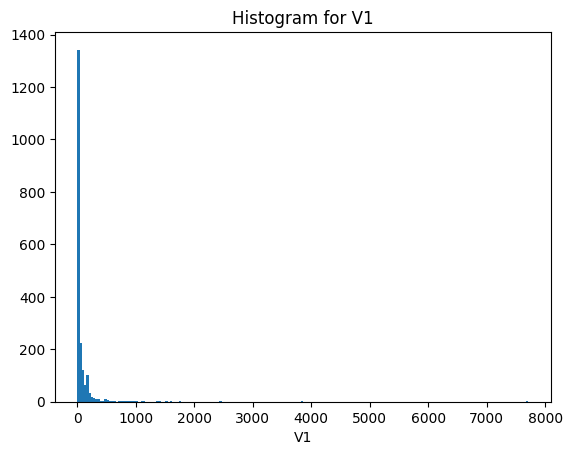

In [ ]:
plt.hist(credit_card_data['Amount'],bins=200)
plt.xlabel('V1')
plt.title('Histogram for V1')
plt.show()

In [ ]:
# distribution of legit transactions and fraudulent transactions
credit_card_data["Class"].value_counts()

0.0    1983
1.0       2
Name: Class, dtype: int64

This Dataset is highly unblanced

0 ->Normal Transaction
1 ->fraudulent transction


In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(1983, 31)
(2, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    1983.000000
mean       68.404892
std       241.572682
min         0.000000
25%         4.950000
50%        15.090000
75%        63.285000
max      7712.430000
Name: Amount, dtype: float64

In [ ]:
 fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_card_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,760.974786,-0.281494,0.267200,0.848906,0.146804,-0.077904,0.051713,0.139533,-0.059771,0.014492,...,0.056618,-0.012217,-0.144666,-0.043548,0.013865,0.108318,0.049441,0.027220,-0.001966,68.404892
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


Under-Sampling


Build a sample dataset containing similar distribution of normal transactions and Fraudlent Transactions

Number of Fraudulent Transactions->205

Concatenating two DataFrames

In [ ]:
 new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
 new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
537,403,1.085214,-0.228464,0.774503,1.379282,-0.469900,0.765731,-0.589284,0.426976,0.865987,...,-0.069035,0.049995,-0.111814,-0.319642,0.574092,-0.250482,0.057517,0.006986,15.00,0.0
1585,1236,-0.932784,1.144672,1.576129,1.415499,-0.759997,0.227839,1.739959,-0.849896,-0.179611,...,0.015882,0.532544,-0.316993,0.646932,0.185211,-0.165423,-0.931096,-0.461318,186.96,0.0
1583,1234,-3.344279,2.619240,-0.644419,-0.049855,-1.556576,0.358310,-1.353135,2.602801,-0.326493,...,-0.006967,-0.125560,0.164106,-0.289734,0.103050,0.312518,0.168046,0.053242,26.21,0.0
1234,952,-0.367514,0.757440,1.187205,1.069518,0.678825,0.269128,0.625554,0.062368,-0.390386,...,0.017659,0.261369,-0.137418,-0.438555,-0.176863,-0.287256,0.192936,0.158820,21.66,0.0
255,180,-0.782666,1.017987,1.505851,0.920905,0.758765,0.392475,1.357625,-0.666453,1.071130,...,-0.410457,0.145970,-0.248113,-0.452121,0.014228,-0.281961,0.118371,-0.508471,23.63,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1187,923,-0.609563,0.511290,1.162807,-0.434358,0.613038,0.281575,0.909177,0.059587,-0.134016,...,-0.091386,-0.201600,-0.025443,-0.732711,-0.142504,0.134767,0.082865,0.130994,69.81,0.0
1344,1048,1.336654,-0.608622,0.608229,-0.516674,-1.170580,-0.623160,-0.663830,-0.023751,-0.684478,...,0.041118,0.165117,-0.017545,0.556650,0.492816,-0.273454,0.009071,0.004571,9.50,0.0
1641,1267,-0.750103,-4.967487,-0.032746,-0.224437,-3.205115,0.427307,-0.197242,-0.067806,-1.205791,...,0.360954,-0.924357,-0.900456,0.366714,-0.190218,-0.377195,-0.139483,0.213044,1127.78,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0


In [ ]:
 new_dataset["Class"].value_counts()

0.0    205
1.0      2
Name: Class, dtype: int64

In [ ]:
 new_dataset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,751.356098,-0.258480,0.117652,0.825271,0.214646,-0.112494,0.113979,0.113274,-0.046890,0.006296,...,0.070364,0.053339,-0.161215,0.004817,0.010279,0.133579,0.062698,0.023423,-0.010794,88.800585
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


Splitting the data into features and Targets

In [ ]:
X = new_dataset.drop(columns="Class",axis=1)
Y = new_dataset["Class"]

In [ ]:
print(X)

      Time        V1        V2        V3        V4        V5        V6  \
537    403  1.085214 -0.228464  0.774503  1.379282 -0.469900  0.765731   
1585  1236 -0.932784  1.144672  1.576129  1.415499 -0.759997  0.227839   
1583  1234 -3.344279  2.619240 -0.644419 -0.049855 -1.556576  0.358310   
1234   952 -0.367514  0.757440  1.187205  1.069518  0.678825  0.269128   
255    180 -0.782666  1.017987  1.505851  0.920905  0.758765  0.392475   
...    ...       ...       ...       ...       ...       ...       ...   
1187   923 -0.609563  0.511290  1.162807 -0.434358  0.613038  0.281575   
1344  1048  1.336654 -0.608622  0.608229 -0.516674 -1.170580 -0.623160   
1641  1267 -0.750103 -4.967487 -0.032746 -0.224437 -3.205115  0.427307   
541    406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   

            V7        V8        V9  ...       V20       V21       V22  \
537  -0.589284  0.426976  0.865987  ..

In [ ]:
2

2

In [ ]:
 print(Y)

537     0.0
1585    0.0
1583    0.0
1234    0.0
255     0.0
       ... 
1187    0.0
1344    0.0
1641    0.0
541     1.0
623     1.0
Name: Class, Length: 207, dtype: float64


Split the Data into Training data and Testing Data

In [ ]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=2)

In [ ]:
 print(X.shape,X_train.shape, X_test.shape)

(207, 30) (155, 30) (52, 30)


Model Training

Logistic Regression

In [ ]:
 model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_test_predict=model.predict(X_test)

In [ ]:
Y_train_predict=model.predict(X_train)

Model Evaluation

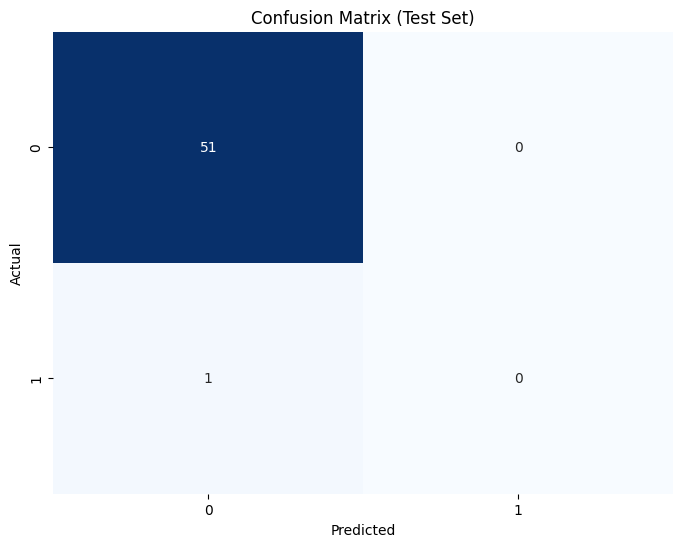

In [ ]:
# Plot a confusion matrix for the test set
conf_matrix = confusion_matrix(Y_test, Y_test_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [ ]:
# Create a classification report for the test set
class_report = classification_report(Y_test, Y_test_predict)
print("Classification Report (Test Set):\n", class_report)

Classification Report (Test Set):
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        51
         1.0       0.00      0.00      0.00         1

    accuracy                           0.98        52
   macro avg       0.49      0.50      0.50        52
weighted avg       0.96      0.98      0.97        52



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


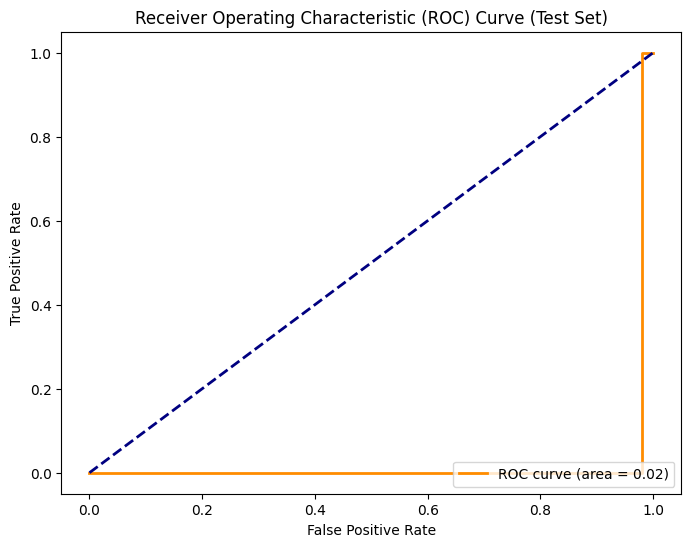

In [ ]:
# Plot the Receiver Operating Characteristic (ROC) curve for the test set
Y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend(loc='lower right')
plt.show()

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = metrics.accuracy_score(X_train_prediction, Y_train)

In [ ]:
print("Accuracy on Training data :", training_data_accuracy)

Accuracy on Training data : 1.0


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = metrics.accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("Accuracy on Test data :", test_data_accuracy)

Accuracy on Test data : 0.9807692307692307


In [ ]:

test_data_recall = metrics.recall_score(X_test_prediction, Y_test)
print("Recall on Test data :", test_data_recall)

Recall on Test data : 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_data_f1 = metrics.f1_score(X_test_prediction, Y_test)
print("F1 Score on Test data :", test_data_f1)

F1 Score on Test data : 0.0
